In [83]:
import pandas as pd
import numpy as np

import os
import sys

# librosa is a Python library for analyzing audio and music. It can be used to extract the data from the audio files we will see it later.
import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
    
# to play the audio files
from IPython.display import Audio

import keras
from keras.callbacks import ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization
from keras.utils import to_categorical  # Use `to_categorical` directly

from keras.callbacks import ModelCheckpoint

import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)


In [82]:
# Paths for data.
Ravdess = "C:\\sers\\dell\\Desktop\\graduation project\\AI04-Grad\\datasets\\CREMA-D\\ravdess"
Crema = "C:\\Users\\dell\\Desktop\\graduation project\\AI04-Grad\\datasets\\CREMA-D"
Tess = "C:\\Users\\dell\\Desktop\\graduation project\\AI04-Grad\\datasets\\CREMA-D\\tess"
Savee = "C:\\Users\\dell\\Desktop\\graduation project\\AI04-Grad\\datasets\\CREMA-D\\SAVEE"


In [99]:
import os
import pandas as pd

# Correct path
Ravdess = r'C:\Users\dell\Desktop\gradproject\AI04-Grad\datasets\CREMA-D\ravdess'

# Verify root path
if not os.path.exists(Ravdess):
    raise FileNotFoundError(f"Path '{Ravdess}' does not exist!")

file_emotion = []
file_path = []

# Iterate through each actor's directory
ravdess_directory_list = os.listdir(Ravdess)
for dir in ravdess_directory_list:
    actor_dir = os.path.join(Ravdess, dir)
    
    # Ensure it's a directory
    if os.path.isdir(actor_dir):
        actor_files = os.listdir(actor_dir)
        
        for file in actor_files:
            if file.endswith('.wav'):  # Only process .wav files
                part = file.split('.')[0].split('-')
                emotion = int(part[2])  # Third part represents emotion
                file_emotion.append(emotion)
                file_path.append(os.path.join(actor_dir, file))

# Create DataFrame
Ravdess_df = pd.DataFrame({
    'Emotions': file_emotion,
    'Path': file_path
})

# Replace emotion labels with names
Ravdess_df.Emotions.replace({
    1: 'neutral', 2: 'calm', 3: 'happy', 4: 'sad',
    5: 'angry', 6: 'fear', 7: 'disgust', 8: 'surprise'
}, inplace=True)

# Save the DataFrame to a CSV file
output_csv = r'C:\Users\dell\Desktop\gradproject\AI04-Grad\datasets\CREMA-D\ravdess_emotions.csv'
Ravdess_df.to_csv(output_csv, index=False)

# Display the first few rows
print("DataFrame saved to:", output_csv)
print(Ravdess_df.head())


DataFrame saved to: C:\Users\dell\Desktop\gradproject\AI04-Grad\datasets\CREMA-D\ravdess_emotions.csv
  Emotions                                               Path
0  neutral  C:\Users\dell\Desktop\gradproject\AI04-Grad\da...
1  neutral  C:\Users\dell\Desktop\gradproject\AI04-Grad\da...
2  neutral  C:\Users\dell\Desktop\gradproject\AI04-Grad\da...
3  neutral  C:\Users\dell\Desktop\gradproject\AI04-Grad\da...
4     calm  C:\Users\dell\Desktop\gradproject\AI04-Grad\da...


In [98]:
import os
import pandas as pd

# Correct path to CREMA-D AudioWAV directory
Crema = r'C:\Users\dell\Desktop\gradproject\AI04-Grad\datasets\CREMA-D\AudioWAV'

# Verify the path exists
if not os.path.exists(Crema):
    raise FileNotFoundError(f"Path '{Crema}' does not exist!")

# List all files in the directory
crema_directory_list = os.listdir(Crema)

file_emotion = []
file_path = []

# Process each file
for file in crema_directory_list:
    full_file_path = os.path.join(Crema, file)
    
    # Ensure it's a .wav file
    if file.endswith('.wav'):
        file_path.append(full_file_path)
        
        # Split the file name by '_'
        part = file.split('_')
        
        # Extract emotions based on the third part of the file name
        if len(part) > 2:  # Ensure part[2] exists
            if part[2] == 'SAD':
                file_emotion.append('sad')
            elif part[2] == 'ANG':
                file_emotion.append('angry')
            elif part[2] == 'DIS':
                file_emotion.append('disgust')
            elif part[2] == 'FEA':
                file_emotion.append('fear')
            elif part[2] == 'HAP':
                file_emotion.append('happy')
            elif part[2] == 'NEU':
                file_emotion.append('neutral')
            else:
                file_emotion.append('Unknown')
        else:
            file_emotion.append('Unknown')

# Create DataFrame for emotions and file paths
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])
path_df = pd.DataFrame(file_path, columns=['Path'])

# Concatenate the DataFrames
Crema_df = pd.concat([emotion_df, path_df], axis=1)

# Save the DataFrame to a CSV file
output_csv = r'C:\Users\dell\Desktop\gradproject\AI04-Grad\datasets\CREMA-D\crema_emotions.csv'
Crema_df.to_csv(output_csv, index=False)

# Display the first few rows
print("DataFrame saved to:", output_csv)
print(Crema_df.head())


DataFrame saved to: C:\Users\dell\Desktop\gradproject\AI04-Grad\datasets\CREMA-D\crema_emotions.csv
  Emotions                                               Path
0    angry  C:\Users\dell\Desktop\gradproject\AI04-Grad\da...
1  disgust  C:\Users\dell\Desktop\gradproject\AI04-Grad\da...
2     fear  C:\Users\dell\Desktop\gradproject\AI04-Grad\da...
3    happy  C:\Users\dell\Desktop\gradproject\AI04-Grad\da...
4  neutral  C:\Users\dell\Desktop\gradproject\AI04-Grad\da...


In [97]:
import os
import pandas as pd

# Correct path to the TESS dataset
Tess = r'C:\Users\dell\Desktop\gradproject\AI04-Grad\datasets\CREMA-D\tess'

# Verify path exists
if not os.path.exists(Tess):
    raise FileNotFoundError(f"Path '{Tess}' does not exist!")

# Initialize lists to store file paths and emotions
file_emotion = []
file_path = []

# Iterate through each emotion directory
tess_directory_list = os.listdir(Tess)
for dir in tess_directory_list:
    emotion_dir = os.path.join(Tess, dir)
    
    # Ensure we are only processing directories
    if os.path.isdir(emotion_dir):
        # Extract the emotion from the folder name
        parts = dir.split('_')
        if len(parts) >= 2:
            emotion = parts[1]  # Extract the emotion from the folder name
        else:
            emotion = 'Unknown'

        # Process the files in the emotion directory
        files = os.listdir(emotion_dir)  # List files in the emotion directory
        for file in files:
            if file.endswith('.wav'):  # Only process .wav files
                file_emotion.append(emotion)  # Use emotion from folder name
                file_path.append(os.path.join(emotion_dir, file))

# Create DataFrames for emotions and file paths
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])
path_df = pd.DataFrame(file_path, columns=['Path'])

# Concatenate the DataFrames
Tess_df = pd.concat([emotion_df, path_df], axis=1)

# Save the DataFrame to a CSV file
output_csv = r'C:\Users\dell\Desktop\gradproject\AI04-Grad\datasets\CREMA-D\TESS_emotions.csv'
Tess_df.to_csv(output_csv, index=False)

# Display the first few rows
print("DataFrame saved to:", output_csv)
print(Tess_df.head())


DataFrame saved to: C:\Users\dell\Desktop\gradproject\AI04-Grad\datasets\CREMA-D\TESS_emotions.csv
  Emotions                                               Path
0    angry  C:\Users\dell\Desktop\gradproject\AI04-Grad\da...
1    angry  C:\Users\dell\Desktop\gradproject\AI04-Grad\da...
2    angry  C:\Users\dell\Desktop\gradproject\AI04-Grad\da...
3    angry  C:\Users\dell\Desktop\gradproject\AI04-Grad\da...
4    angry  C:\Users\dell\Desktop\gradproject\AI04-Grad\da...


In [100]:
import os
import pandas as pd

# Correct path to the SAVEE dataset
Savee = r'C:\Users\dell\Desktop\gradproject\AI04-Grad\datasets\CREMA-D\savee\\'

# Verify the path exists
if not os.path.exists(Savee):
    raise FileNotFoundError(f"Path '{Savee}' does not exist!")

# Initialize lists to store file paths and emotions
file_emotion = []
file_path = []

# List all files in the SAVEE directory
savee_directory_list = os.listdir(Savee)

# Process each file
for file in savee_directory_list:
    full_path = os.path.join(Savee, file)
    if file.endswith('.wav'):  # Process only .wav files
        file_path.append(full_path)
        part = file.split('_')[1]  # Extract the second part of the file name
        ele = part[:-6]  # Extract the emotion code

        # Map emotion codes to emotion names
        if ele == 'a':
            file_emotion.append('angry')
        elif ele == 'd':
            file_emotion.append('disgust')
        elif ele == 'f':
            file_emotion.append('fear')
        elif ele == 'h':
            file_emotion.append('happy')
        elif ele == 'n':
            file_emotion.append('neutral')
        elif ele == 'sa':
            file_emotion.append('sad')
        else:
            file_emotion.append('surprise')

# Create DataFrame for emotions and file paths
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])
path_df = pd.DataFrame(file_path, columns=['Path'])

# Combine DataFrames
Savee_df = pd.concat([emotion_df, path_df], axis=1)

# Save to a CSV file
output_csv = r'C:\Users\dell\Desktop\gradproject\AI04-Grad\datasets\CREMA-D\savee_emotions.csv'
Savee_df.to_csv(output_csv, index=False)

# Display confirmation and the first few rows
print("DataFrame saved to:", output_csv)
print(Savee_df.head())


DataFrame saved to: C:\Users\dell\Desktop\gradproject\AI04-Grad\datasets\CREMA-D\savee_emotions.csv
  Emotions                                               Path
0    angry  C:\Users\dell\Desktop\gradproject\AI04-Grad\da...
1    angry  C:\Users\dell\Desktop\gradproject\AI04-Grad\da...
2    angry  C:\Users\dell\Desktop\gradproject\AI04-Grad\da...
3    angry  C:\Users\dell\Desktop\gradproject\AI04-Grad\da...
4    angry  C:\Users\dell\Desktop\gradproject\AI04-Grad\da...


In [120]:
# Paths to the CSV files
crema_csv = r'C:\Users\dell\Desktop\gradproject\AI04-Grad\datasets\CREMA-D\crema_emotions.csv'
ravdess_csv = r'C:\Users\dell\Desktop\gradproject\AI04-Grad\datasets\CREMA-D\ravdess_emotions.csv'
savee_csv = r'C:\Users\dell\Desktop\gradproject\AI04-Grad\datasets\CREMA-D\savee_emotions.csv'
tess_csv = r'C:\Users\dell\Desktop\gradproject\AI04-Grad\datasets\CREMA-D\TESS_emotions.csv'

# Load the CSV files
crema_df = pd.read_csv(crema_csv)
ravdess_df = pd.read_csv(ravdess_csv)
savee_df = pd.read_csv(savee_csv)
tess_df = pd.read_csv(tess_csv)

# Combine all the datasets into one
combined_df = pd.concat([crema_df, ravdess_df, savee_df, tess_df], ignore_index=True)

# Filter for only the 5 emotions: sad, angry, happy, fear, neutral
filtered_emotions = ['sad', 'angry', 'happy', 'fear', 'neutral']
filtered_df = combined_df[combined_df['Emotions'].isin(filtered_emotions)]

# Save the filtered DataFrame to a new CSV file
output_csv = r'C:\Users\dell\Desktop\gradproject\AI04-Grad\datasets\CREMA-D\filtered_emotions.csv'
filtered_df.to_csv(output_csv, index=False)

# Print confirmation and the first few rows
print(f"Filtered data saved to: {output_csv}")
print(filtered_df.head())


Filtered data saved to: C:\Users\dell\Desktop\gradproject\AI04-Grad\datasets\CREMA-D\filtered_emotions.csv
  Emotions                                               Path
0    angry  C:\Users\dell\Desktop\gradproject\AI04-Grad\da...
2     fear  C:\Users\dell\Desktop\gradproject\AI04-Grad\da...
3    happy  C:\Users\dell\Desktop\gradproject\AI04-Grad\da...
4  neutral  C:\Users\dell\Desktop\gradproject\AI04-Grad\da...
5      sad  C:\Users\dell\Desktop\gradproject\AI04-Grad\da...


In [101]:
# creating Dataframe using all the 4 dataframes we created so far.
data_path = pd.concat([Ravdess_df, Crema_df, Tess_df, Savee_df], axis = 0)
data_path.to_csv("data_path.csv",index=False)
data_path.head()


Emotions                                               Path
0  neutral  C:\Users\dell\Desktop\gradproject\AI04-Grad\da...
1  neutral  C:\Users\dell\Desktop\gradproject\AI04-Grad\da...
2  neutral  C:\Users\dell\Desktop\gradproject\AI04-Grad\da...
3  neutral  C:\Users\dell\Desktop\gradproject\AI04-Grad\da...
4     calm  C:\Users\dell\Desktop\gradproject\AI04-Grad\da...

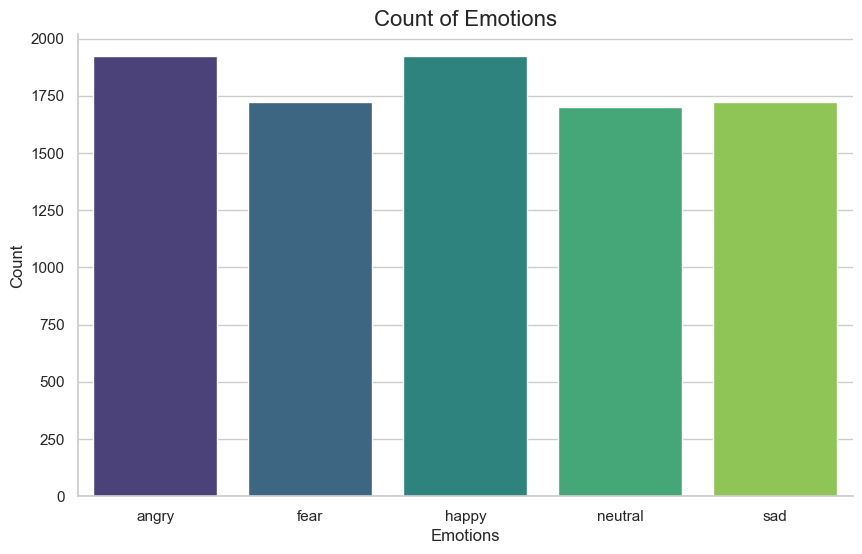

In [127]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_emotion_distribution(df):
    """
    Plots the distribution of emotions in a given DataFrame.
    
    Parameters:
    - df: DataFrame containing a column 'Emotions'
    """
    sns.set(style="whitegrid")
    plt.figure(figsize=(10, 6))
    plt.title('Count of Emotions', size=16)
    sns.countplot(data=df, x='Emotions', palette='viridis')
    plt.ylabel('Count', size=12)
    plt.xlabel('Emotions', size=12)
    sns.despine(top=True, right=True)
    plt.show()

# Load the filtered emotions CSV
filtered_csv = r'C:\Users\dell\Desktop\gradproject\AI04-Grad\datasets\CREMA-D\filtered_emotions.csv'
filtered_df = pd.read_csv(filtered_csv)

# Plot the emotion distribution
plot_emotion_distribution(filtered_df)


In [109]:
def create_waveplot(data, sr, e):
    plt.figure(figsize=(10, 3))
    plt.title('Waveplot for audio with {} emotion'.format(e), size=15)
    librosa.display.waveplot(data, sr=sr)
    plt.show()

def create_spectrogram(data, sr, e):
    # stft function converts the data into short term fourier transform
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(12, 3))
    plt.title('Spectrogram for audio with {} emotion'.format(e), size=15)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')   
    #librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar()


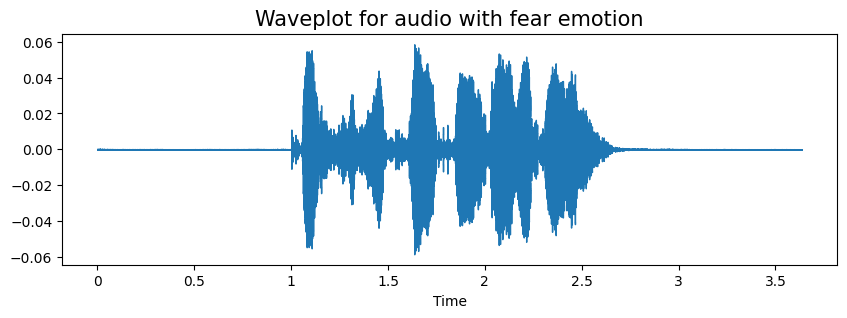

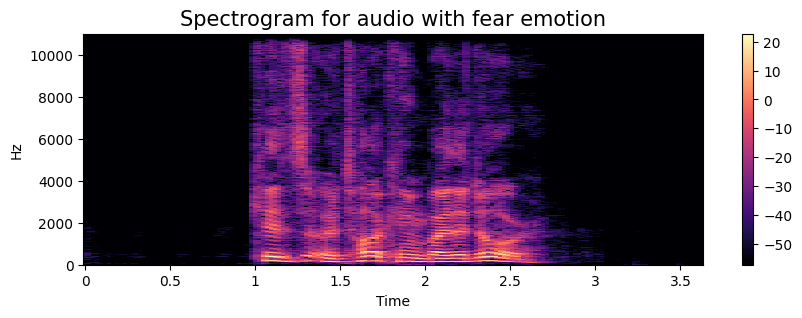

In [110]:
# Function to create waveplot
def create_waveplot(data, sr, emotion):
    plt.figure(figsize=(10, 3))
    plt.title(f'Waveplot for audio with {emotion} emotion', size=15)
    librosa.display.waveshow(data, sr=sr)
    plt.show()

# Function to create spectrogram
def create_spectrogram(data, sr, emotion):
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(10, 3))
    plt.title(f'Spectrogram for audio with {emotion} emotion', size=15)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()
    plt.show()

# Example usage
emotion = 'fear'
path = np.array(data_path.Path[data_path.Emotions == emotion])[1]
data, sampling_rate = librosa.load(path)

# Create waveplot and spectrogram
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)

# Play the audio
Audio(path)


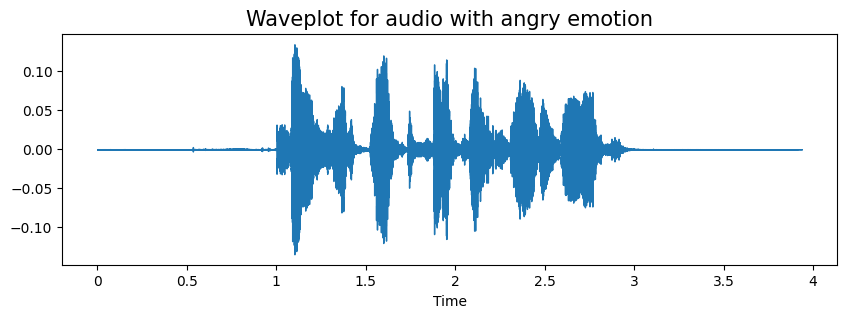

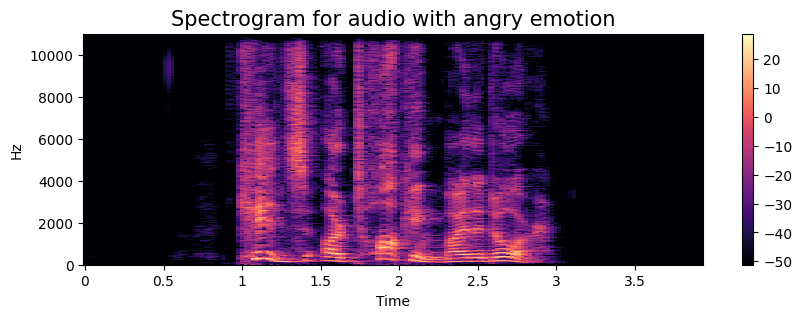

In [111]:
emotion='angry'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)


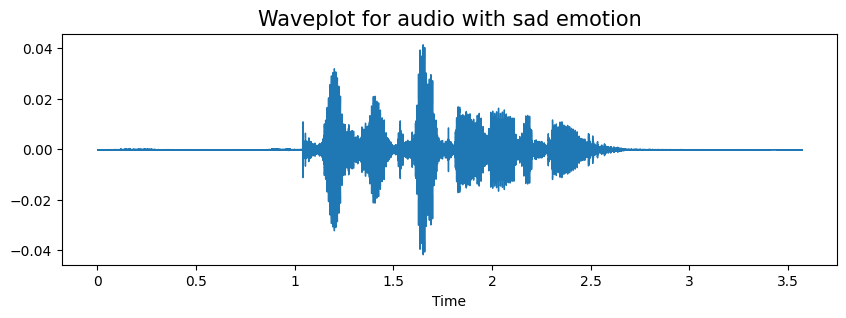

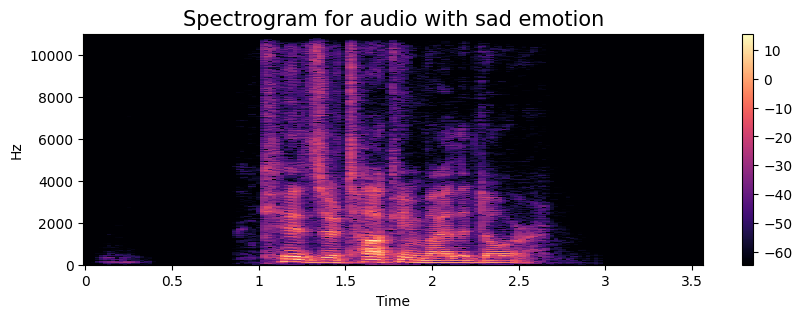

In [112]:
emotion='sad'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)


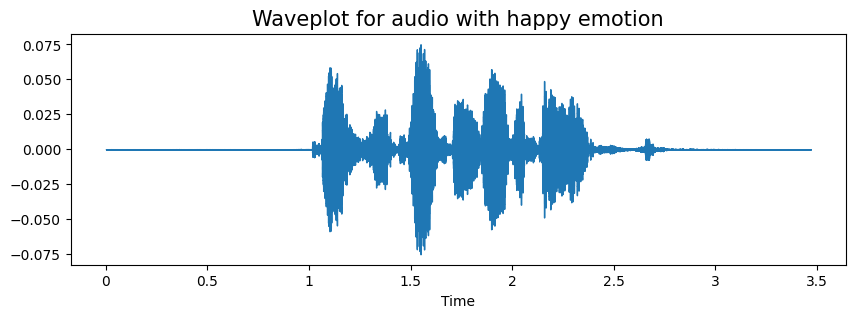

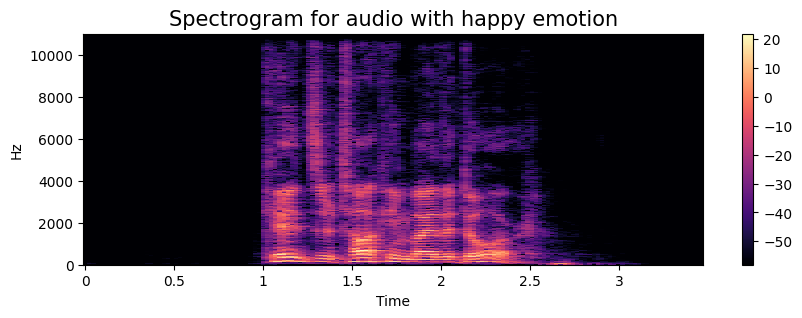

In [113]:
emotion='happy'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)


In [114]:
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(data, rate)

def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)

def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(data, sampling_rate, pitch_factor)

# taking any example and checking for techniques.
path = np.array(data_path.Path)[1]
data, sample_rate = librosa.load(path)


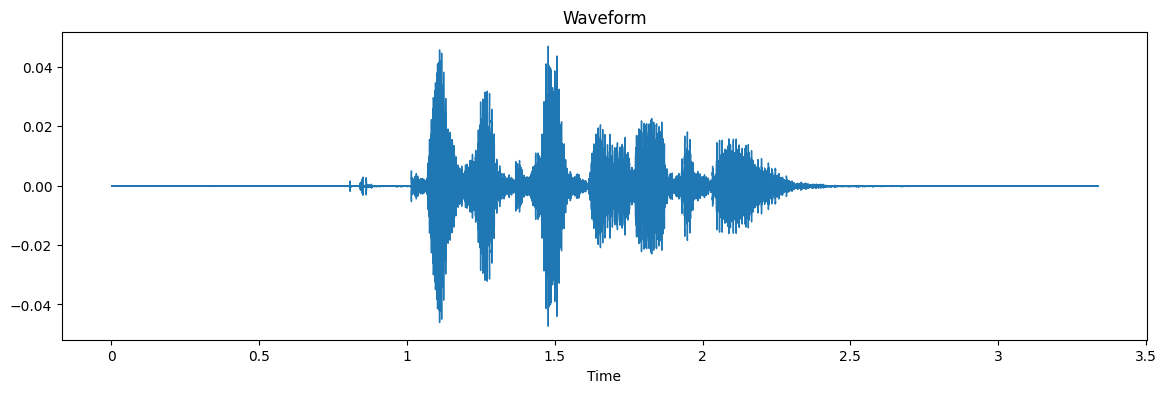

In [115]:
plt.figure(figsize=(14, 4))
librosa.display.waveshow(y=data, sr=sample_rate)  # Use 'waveshow' instead of 'waveplot'
plt.title('Waveform')
plt.show()

# Play the audio
Audio(path)


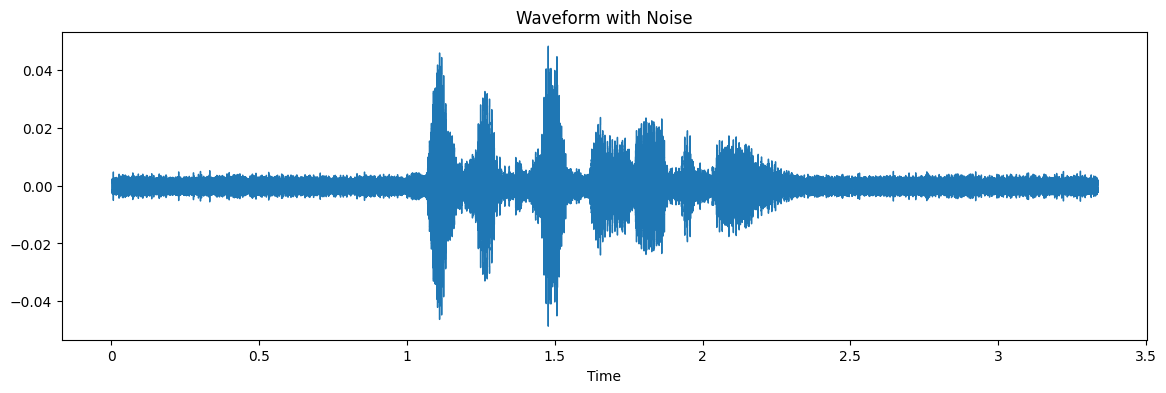

In [116]:
x = noise(data)

# Plot the waveform using 'waveshow'
plt.figure(figsize=(14, 4))
librosa.display.waveshow(y=x, sr=sample_rate)  # Use 'waveshow' instead of 'waveplot'
plt.title('Waveform with Noise')
plt.show()

# Play the modified audio with noise
Audio(x, rate=sample_rate)


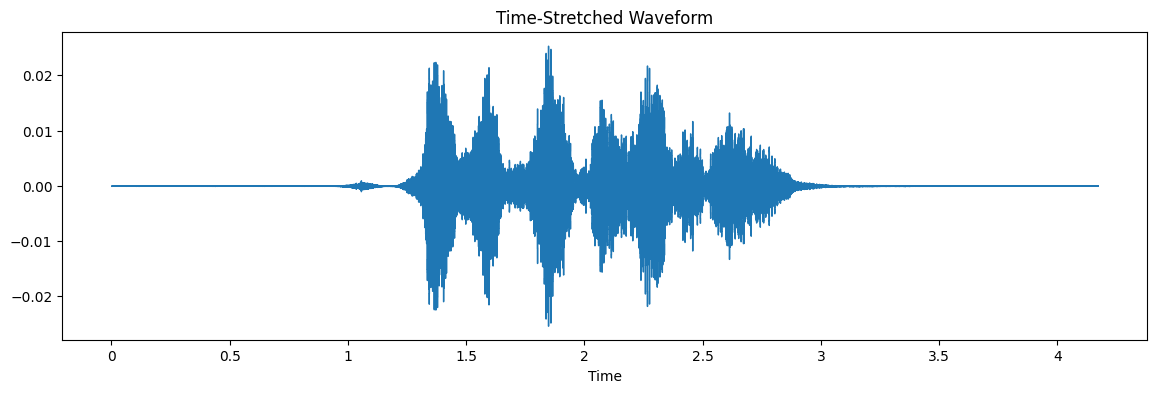

In [117]:
import librosa

# Corrected stretch function for librosa time-stretch
def stretch(data, rate=0.8):
    # Ensure data is a valid numpy array of the audio signal
    if isinstance(data, (list, np.ndarray)):
        return librosa.effects.time_stretch(y=data, rate=rate)
    else:
        raise ValueError("Input data must be a valid audio signal (array).")

# Apply time-stretch to the audio
x = stretch(data, rate=0.8)

# Plot the time-stretched waveform using 'waveshow'
plt.figure(figsize=(14, 4))
librosa.display.waveshow(y=x, sr=sample_rate)  # Correct 'waveshow'
plt.title('Time-Stretched Waveform')
plt.show()

# Play the time-stretched audio
Audio(x, rate=sample_rate)


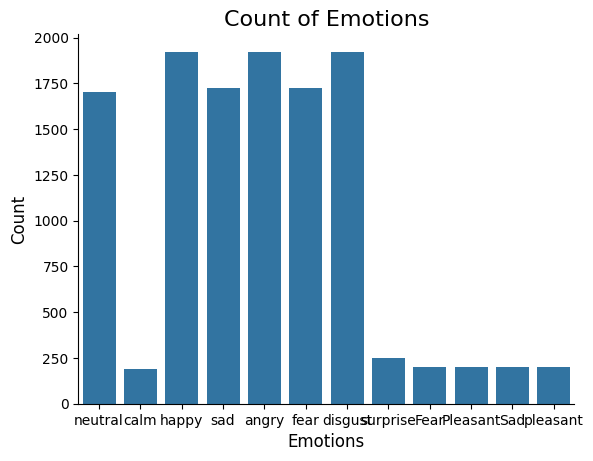

Accessing file: C:\Users\dell\Desktop\gradproject\AI04-Grad\datasets\CREMA-D\ravdess\Actor_01\03-01-01-01-01-01-01.wav
Accessing file: C:\Users\dell\Desktop\gradproject\AI04-Grad\datasets\CREMA-D\ravdess\Actor_01\03-01-01-01-01-02-01.wav
Accessing file: C:\Users\dell\Desktop\gradproject\AI04-Grad\datasets\CREMA-D\ravdess\Actor_01\03-01-01-01-02-01-01.wav
Accessing file: C:\Users\dell\Desktop\gradproject\AI04-Grad\datasets\CREMA-D\ravdess\Actor_01\03-01-01-01-02-02-01.wav
Accessing file: C:\Users\dell\Desktop\gradproject\AI04-Grad\datasets\CREMA-D\ravdess\Actor_01\03-01-02-01-01-01-01.wav
Accessing file: C:\Users\dell\Desktop\gradproject\AI04-Grad\datasets\CREMA-D\ravdess\Actor_01\03-01-02-01-01-02-01.wav
Accessing file: C:\Users\dell\Desktop\gradproject\AI04-Grad\datasets\CREMA-D\ravdess\Actor_01\03-01-02-01-02-01-01.wav
Accessing file: C:\Users\dell\Desktop\gradproject\AI04-Grad\datasets\CREMA-D\ravdess\Actor_01\03-01-02-01-02-02-01.wav
Accessing file: C:\Users\dell\Desktop\gradprojec

KeyboardInterrupt: 

In [118]:
import os
import numpy as np
import pandas as pd
import librosa
import matplotlib.pyplot as plt
import seaborn as sns

# Paths for data
Ravdess = r'C:\Users\dell\Desktop\graduation project\AI04-Grad\datasets\CREMA-D\ravdess\\'
Crema = r'C:\Users\dell\Desktop\graduation project\AI04-Grad\datasets\CREMA-D\AudioWAV\\'
Tess = r'C:\Users\dell\Desktop\graduation project\AI04-Grad\datasets\CREMA-D\tess\\'
Savee = r'C:\Users\dell\Desktop\graduation project\AI04-Grad\datasets\CREMA-D\SAVEE\\'

# Assuming dataframes Ravdess_df, Crema_df, Tess_df, Savee_df are already loaded
# Combine all datasets into one DataFrame
data_path = pd.concat([Ravdess_df, Crema_df, Tess_df, Savee_df], axis=0)
data_path.to_csv("data_path.csv", index=False)

# Visualization of emotion counts
plt.title('Count of Emotions', size=16)
sns.countplot(x='Emotions', data=data_path)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

# Define feature extraction functions
def extract_features(data, sample_rate):
    result = np.array([])

    # Zero Crossing Rate (ZCR)
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis=0)
    result = np.hstack((result, zcr))
    
    # Chroma STFT
    stft = np.abs(librosa.stft(data))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
    result = np.hstack((result, chroma_stft))

    # Mel-frequency cepstral coefficients (MFCC)
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mfcc))

    # Root Mean Square (RMS)
    rms = np.mean(librosa.feature.rms(y=data).T, axis=0)
    result = np.hstack((result, rms))

    # MelSpectrogram
    mel = np.mean(librosa.feature.melspectrogram(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mel))
    
    return result

# Augmentation functions
def noise(data, noise_factor=0.005):
    """
    Adds random noise to the data
    """
    noise = np.random.randn(len(data))
    augmented_data = data + noise_factor * noise
    return augmented_data

def stretch(data, rate=0.8):
    """
    Stretches the data
    """
    return librosa.effects.time_stretch(y=data, rate=rate)

def pitch(data, sampling_rate, pitch_factor=0.7):
    """
    Shifts the pitch of the data
    """
    return librosa.effects.pitch_shift(y=data, sr=sampling_rate, n_steps=pitch_factor)

# Extract features with augmentations
def get_features(path):
    data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)

    # Without augmentation
    res1 = extract_features(data, sample_rate)
    result = np.array(res1)

    # Data with noise
    noise_data = noise(data)
    res2 = extract_features(noise_data, sample_rate)
    result = np.vstack((result, res2))

    # Data with stretching and pitching
    stretched_data = stretch(data)
    data_stretch_pitch = pitch(stretched_data, sample_rate)
    res3 = extract_features(data_stretch_pitch, sample_rate)
    result = np.vstack((result, res3))
    
    return result

# Initialize lists for features and labels
X, Y = [], []

# Extract features from all audio files
for index, row in data_path.iterrows():
    path = row['Path']
    emotion = row['Emotions']
    
    # Construct the correct path (ensure this points to your audio files)
    file_path = os.path.join(Crema, path)  # Adjust the directory as needed
    
    # Check if the file exists
    if os.path.isfile(file_path):
        print(f"Accessing file: {file_path}")
        feature = get_features(file_path)
        for ele in feature:
            X.append(ele)
            Y.append(emotion)  # Appending the emotion 3 times due to augmentations
    else:
        print(f"File not found: {file_path}")

# Convert to DataFrame and save to CSV
Features = pd.DataFrame(X)
Features['labels'] = Y
Features.to_csv('features.csv', index=False)

# Display the features DataFrame
print(Features.head())


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 162, 256)       │         1,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 81, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 81, 256)        │       327,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 41, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 41, 128)        │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 21, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 21, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 21, 64)         │        41,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_3 (MaxPooling1D)  │ (None, 11, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 704)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │        22,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           264 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 557,288 (2.13 MB)

 Trainable params: 557,288 (2.13 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 17s 92ms/step - accuracy: 0.2786 - loss: 1.8364 - val_accuracy: 0.5887 - val_loss: 1.1864 - learning_rate: 0.0010
Epoch 2/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 14s 90ms/step - accuracy: 0.5494 - loss: 1.2230 - val_accuracy: 0.6849 - val_loss: 0.9216 - learning_rate: 0.0010
Epoch 3/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 14s 93ms/step - accuracy: 0.6222 - loss: 1.0273 - val_accuracy: 0.6884 - val_loss: 0.8252 - learning_rate: 0.0010
Epoch 4/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 17s 115ms/step - accuracy: 0.6607 - loss: 0.8951 - val_accuracy: 0.7179 - val_loss: 0.7575 - learning_rate: 0.0010
Epoch 5/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 16s 103ms/step - accuracy: 0.6793 - loss: 0.8630 - val_accuracy: 0.7412 - val_loss: 0.6890 - learning_rate: 0.0010
Epoch 6/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 15s 98ms/step - accuracy: 0.7273 - loss: 0.7408 - val_accuracy: 0.7588 - val_loss: 0.6447 - learning_rate: 0.0010
Epoch 7/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 15s 99ms/step - accuracy: 0.7440 -

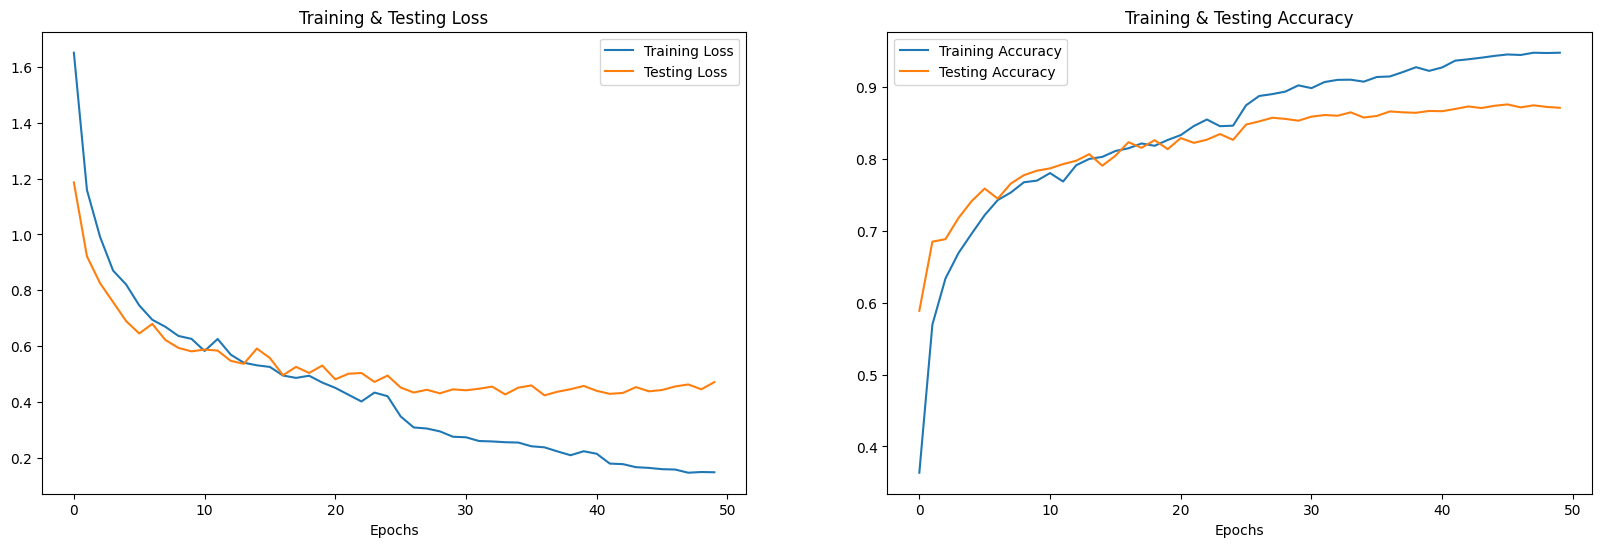

100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step


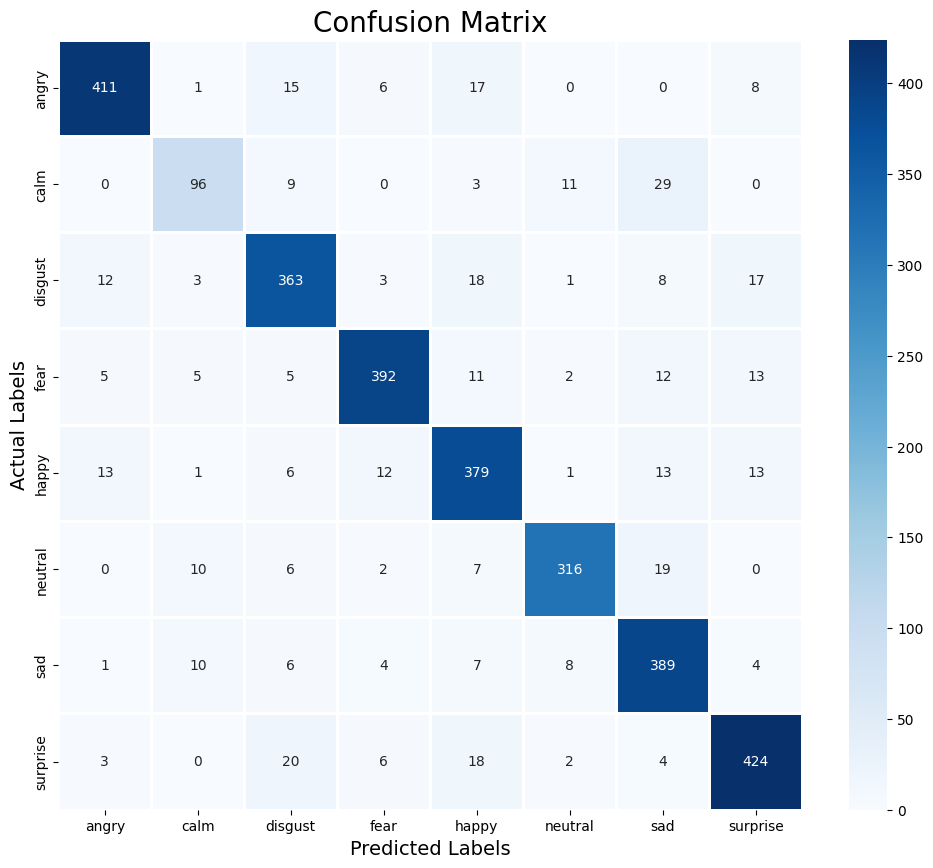

              precision    recall  f1-score   support

       angry       0.92      0.90      0.91       458
        calm       0.76      0.65      0.70       148
     disgust       0.84      0.85      0.85       425
        fear       0.92      0.88      0.90       445
       happy       0.82      0.87      0.84       438
     neutral       0.93      0.88      0.90       360
         sad       0.82      0.91      0.86       429
    surprise       0.89      0.89      0.89       477

    accuracy                           0.87      3180
   macro avg       0.86      0.85      0.86      3180
weighted avg       0.87      0.87      0.87      3180



In [25]:
# Load features and labels
Features = pd.read_csv('features.csv')

# Prepare data
X = Features.iloc[:, :-1].values
Y = Features['labels'].values

# One-hot encode labels
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1, 1)).toarray()

# Split the data
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=0, shuffle=True)

# Scale the data
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Reshape data for CNN
x_train = np.expand_dims(x_train, axis=2)
x_test = np.expand_dims(x_test, axis=2)

# Build the model
model = Sequential()
model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(x_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=5, strides=2, padding='same'))

model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides=2, padding='same'))

model.add(Conv1D(128, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides=2, padding='same'))
model.add(Dropout(0.2))

model.add(Conv1D(64, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides=2, padding='same'))

model.add(Flatten())
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(units=len(encoder.categories_[0]), activation='softmax'))  # Use the number of classes

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()

# Set up learning rate reduction
rlrp = ReduceLROnPlateau(monitor='loss', factor=0.4, verbose=0, patience=2, min_lr=1e-7)

# Train the model
history = model.fit(x_train, y_train, batch_size=64, epochs=50, validation_data=(x_test, y_test), callbacks=[rlrp])

# Evaluate the model
print("Accuracy of our model on test data:", model.evaluate(x_test, y_test)[1] * 100, "%")

# Plot training and validation metrics
epochs = [i for i in range(50)]
fig, ax = plt.subplots(1, 2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20, 6)
ax[0].plot(epochs, train_loss, label='Training Loss')
ax[0].plot(epochs, test_loss, label='Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs, train_acc, label='Training Accuracy')
ax[1].plot(epochs, test_acc, label='Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

# Predict on test data
pred_test = model.predict(x_test)
y_pred = encoder.inverse_transform(pred_test)

# Get actual labels
y_test_labels = encoder.inverse_transform(y_test)

# Create a DataFrame for comparison
df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_pred.flatten()
df['Actual Labels'] = y_test_labels.flatten()

# Confusion matrix
cm = confusion_matrix(y_test_labels, y_pred)
cm_df = pd.DataFrame(cm, index=encoder.categories_[0], columns=encoder.categories_[0])

# Plot confusion matrix
plt.figure(figsize=(12, 10))
sns.heatmap(cm_df, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

# Print classification report
print(classification_report(y_test_labels, y_pred))


In [26]:
# Model summary
model.summary()
print("Model: \"Keras Sequential model\"")

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 162, 256)       │         1,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 81, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 81, 256)        │       327,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 41, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 41, 128)        │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 21, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 21, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 21, 64)         │        41,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_3 (MaxPooling1D)  │ (None, 11, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 704)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │        22,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           264 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,671,866 (6.38 MB)

 Trainable params: 557,288 (2.13 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,114,578 (4.25 MB)

Model: "Keras Sequential model"


Model: "GRU_Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_2 (GRU)                     │ (None, 162, 128)       │        50,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 162, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_3 (GRU)                     │ (None, 64)             │        37,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 8)              │           264 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 89,896 (351.16 KB)

 Trainable params: 89,896 (351.16 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 49s 294ms/step - accuracy: 0.1387 - loss: 2.0528 - val_accuracy: 0.1714 - val_loss: 1.9957 - learning_rate: 0.0010
Epoch 2/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 43s 285ms/step - accuracy: 0.1711 - loss: 2.0075 - val_accuracy: 0.1752 - val_loss: 1.9893 - learning_rate: 0.0010
Epoch 3/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 42s 280ms/step - accuracy: 0.1752 - loss: 1.9869 - val_accuracy: 0.2104 - val_loss: 1.9026 - learning_rate: 0.0010
Epoch 4/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 45s 301ms/step - accuracy: 0.2039 - loss: 1.9441 - val_accuracy: 0.2044 - val_loss: 1.9060 - learning_rate: 0.0010
Epoch 5/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 44s 293ms/step - accuracy: 0.1932 - loss: 1.9223 - val_accuracy: 0.2195 - val_loss: 1.8961 - learning_rate: 0.0010
Epoch 6/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 44s 291ms/step - accuracy: 0.2175 - loss: 1.8914 - val_accuracy: 0.2242 - val_loss: 1.8983 - learning_rate: 0.0010
Epoch 7/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 44s 295ms/step - accuracy: 0.2

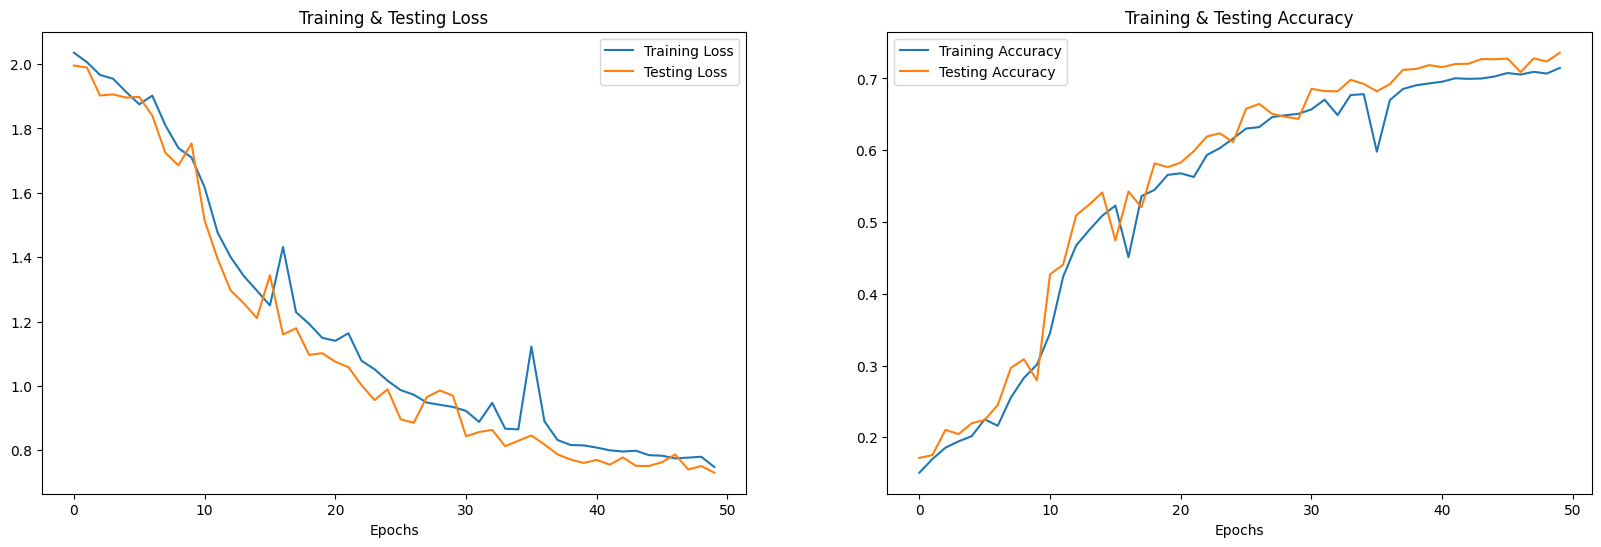

100/100 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step


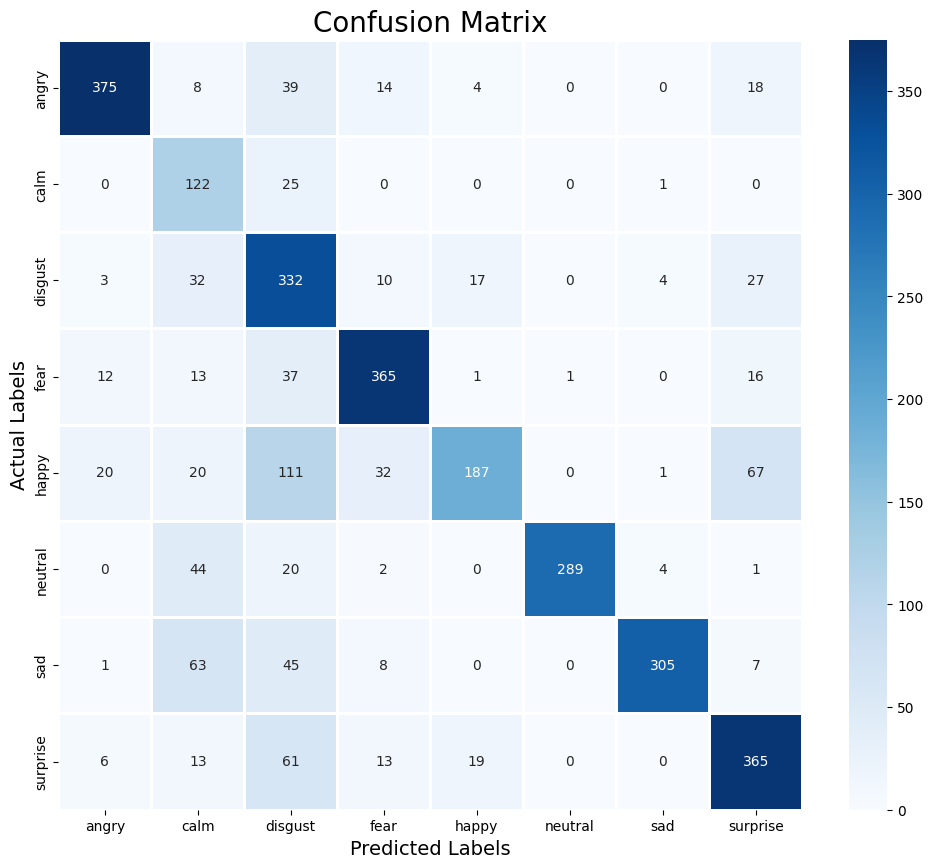

              precision    recall  f1-score   support

       angry       0.90      0.82      0.86       458
        calm       0.39      0.82      0.53       148
     disgust       0.50      0.78      0.61       425
        fear       0.82      0.82      0.82       445
       happy       0.82      0.43      0.56       438
     neutral       1.00      0.80      0.89       360
         sad       0.97      0.71      0.82       429
    surprise       0.73      0.77      0.75       477

    accuracy                           0.74      3180
   macro avg       0.76      0.74      0.73      3180
weighted avg       0.79      0.74      0.74      3180



In [28]:
import pandas as pd
import numpy as np
import os
import sys
import librosa
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from keras.models import Sequential
from keras.layers import GRU, Dense, Dropout, Flatten
from keras.callbacks import ReduceLROnPlateau
import warnings

# Ignore warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

# Load features and labels
Features = pd.read_csv('features.csv')

# Prepare data
X = Features.iloc[:, :-1].values
Y = Features['labels'].values

# One-hot encode labels
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1, 1)).toarray()

# Split the data
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=0, shuffle=True)

# Scale the data
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Reshape data for GRU (must be 3D for GRU input)
x_train = np.expand_dims(x_train, axis=2)
x_test = np.expand_dims(x_test, axis=2)

# Build the GRU-based model with a custom name
model = Sequential(name="GRU_Model")  # Adding a custom model name

# GRU layers
model.add(GRU(128, return_sequences=True, input_shape=(x_train.shape[1], 1), activation='relu'))
model.add(Dropout(0.3))

model.add(GRU(64, activation='relu'))
model.add(Dropout(0.3))

# Dense layers for classification
model.add(Flatten())
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.3))

# Final output layer for the number of classes
model.add(Dense(units=len(encoder.categories_[0]), activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()

# Set up learning rate reduction
rlrp = ReduceLROnPlateau(monitor='loss', factor=0.4, verbose=0, patience=2, min_lr=1e-7)

# Train the model
history = model.fit(x_train, y_train, batch_size=64, epochs=50, validation_data=(x_test, y_test), callbacks=[rlrp])

# Evaluate the model
print("Accuracy of our model on test data:", model.evaluate(x_test, y_test)[1] * 100, "%")

# Plot training and validation metrics
epochs = [i for i in range(50)]
fig, ax = plt.subplots(1, 2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20, 6)
ax[0].plot(epochs, train_loss, label='Training Loss')
ax[0].plot(epochs, test_loss, label='Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs, train_acc, label='Training Accuracy')
ax[1].plot(epochs, test_acc, label='Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

# Predict on test data
pred_test = model.predict(x_test)
y_pred = encoder.inverse_transform(pred_test)

# Get actual labels
y_test_labels = encoder.inverse_transform(y_test)

# Create a DataFrame for comparison
df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_pred.flatten()
df['Actual Labels'] = y_test_labels.flatten()

# Confusion matrix
cm = confusion_matrix(y_test_labels, y_pred)
cm_df = pd.DataFrame(cm, index=encoder.categories_[0], columns=encoder.categories_[0])

# Plot confusion matrix
plt.figure(figsize=(12, 10))
sns.heatmap(cm_df, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

# Print classification report
print(classification_report(y_test_labels, y_pred))


Model: "LSTM_Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 162, 128)       │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 162, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 8)              │           264 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 118,312 (462.16 KB)

 Trainable params: 118,312 (462.16 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 42s 253ms/step - accuracy: 0.1576 - loss: 2.0664 - val_accuracy: 0.1962 - val_loss: 1.9644 - learning_rate: 1.0000e-04
Epoch 2/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 35s 236ms/step - accuracy: 0.1990 - loss: 1.9791 - val_accuracy: 0.2116 - val_loss: 1.9319 - learning_rate: 1.0000e-04
Epoch 3/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 35s 231ms/step - accuracy: 0.1943 - loss: 1.9568 - val_accuracy: 0.2418 - val_loss: 1.8763 - learning_rate: 1.0000e-04
Epoch 4/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 36s 241ms/step - accuracy: 0.2188 - loss: 1.9084 - val_accuracy: 0.2862 - val_loss: 1.8245 - learning_rate: 1.0000e-04
Epoch 5/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 38s 254ms/step - accuracy: 0.2424 - loss: 1.8563 - val_accuracy: 0.2796 - val_loss: 1.8176 - learning_rate: 1.0000e-04
Epoch 6/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 69s 464ms/step - accuracy: 0.2600 - loss: 1.8442 - val_accuracy: 0.2852 - val_loss: 1.7889 - learning_rate: 1.0000e-04
Epoch 7/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 58s 38

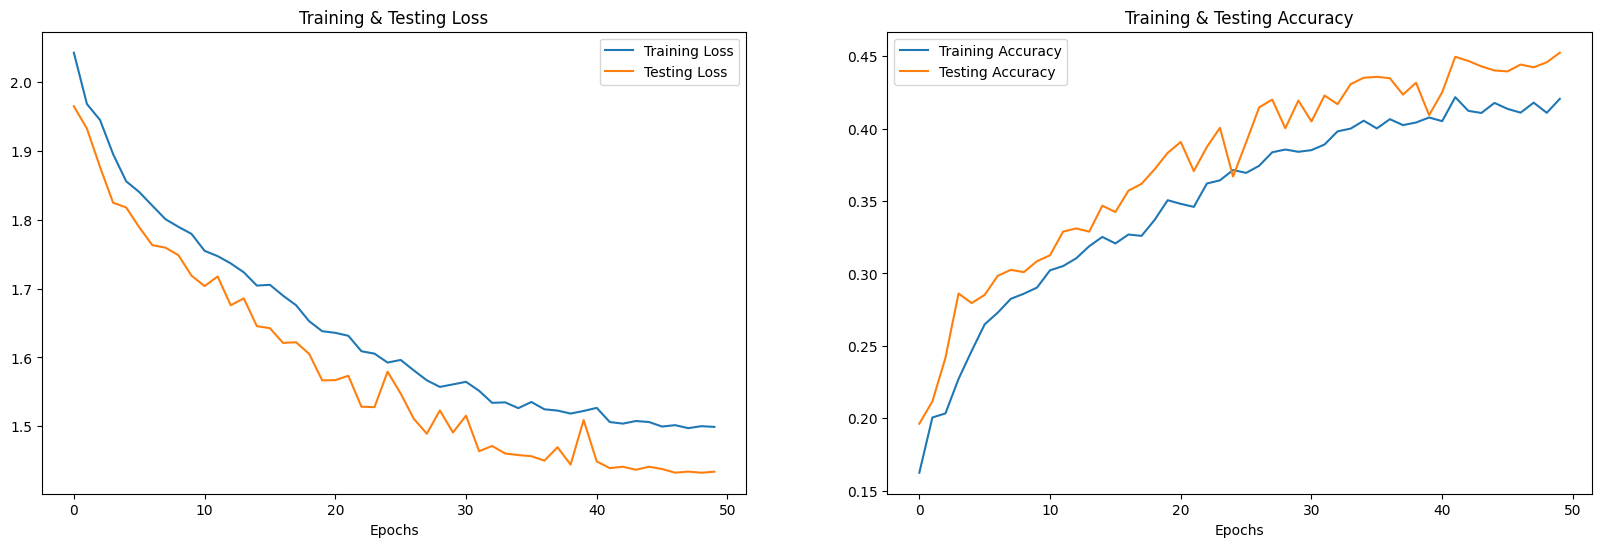

100/100 ━━━━━━━━━━━━━━━━━━━━ 7s 61ms/step


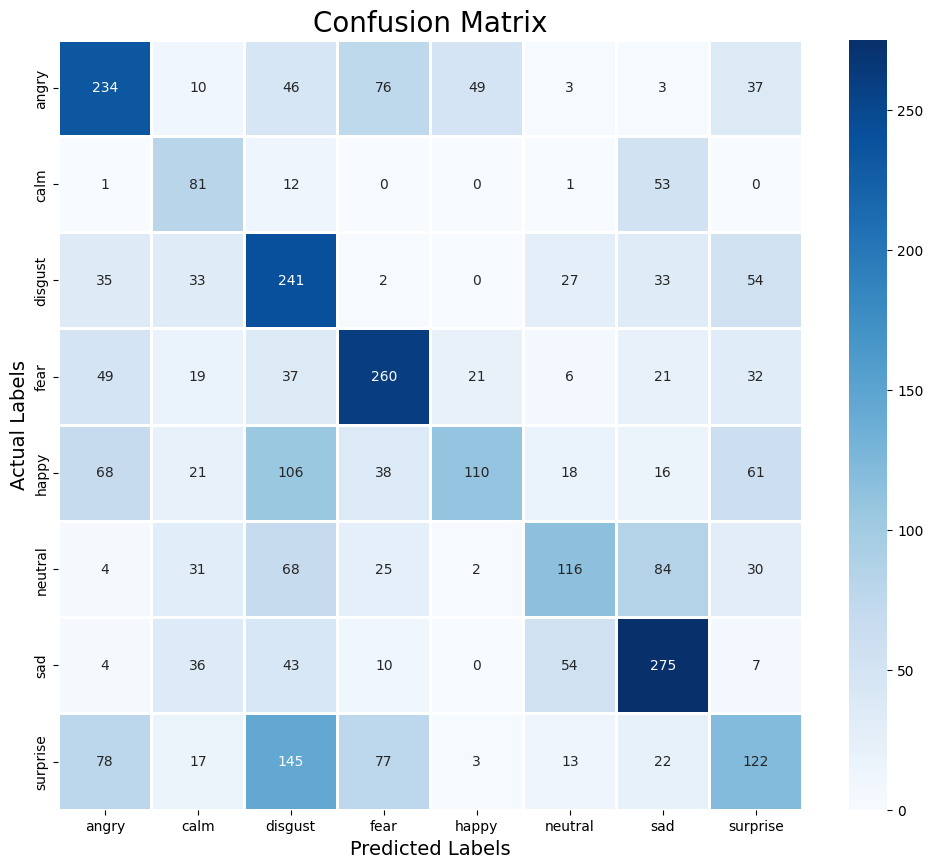

              precision    recall  f1-score   support

       angry       0.49      0.51      0.50       458
        calm       0.33      0.55      0.41       148
     disgust       0.35      0.57      0.43       425
        fear       0.53      0.58      0.56       445
       happy       0.59      0.25      0.35       438
     neutral       0.49      0.32      0.39       360
         sad       0.54      0.64      0.59       429
    surprise       0.36      0.26      0.30       477

    accuracy                           0.45      3180
   macro avg       0.46      0.46      0.44      3180
weighted avg       0.47      0.45      0.44      3180



In [2]:
import pandas as pd
import numpy as np
import os
import sys
import librosa
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Flatten
from keras.callbacks import ReduceLROnPlateau
from keras.optimizers import Adam
from keras.constraints import MaxNorm  # For gradient clipping
import warnings

# Ignore warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

# Load features and labels
Features = pd.read_csv('features.csv')

# Prepare data
X = Features.iloc[:, :-1].values
Y = Features['labels'].values

# One-hot encode labels
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1, 1)).toarray()

# Split the data
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=0, shuffle=True)

# Scale the data
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Reshape data for LSTM (must be 3D for LSTM input)
x_train = np.expand_dims(x_train, axis=2)
x_test = np.expand_dims(x_test, axis=2)

# Build the LSTM-based model with gradient clipping
model = Sequential(name="LSTM_Model")  # Adding a custom model name

# LSTM layers with tanh activation and MaxNorm to prevent gradient explosion
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], 1), activation='tanh', kernel_constraint=MaxNorm(3)))
model.add(Dropout(0.3))

model.add(LSTM(64, activation='tanh', kernel_constraint=MaxNorm(3)))
model.add(Dropout(0.3))

# Dense layers for classification
model.add(Flatten())
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.3))

# Final output layer for the number of classes
model.add(Dense(units=len(encoder.categories_[0]), activation='softmax'))

# Compile the model with a lower learning rate and Adam optimizer
optimizer = Adam(learning_rate=1e-4)  # Adjust learning rate
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()

# Set up learning rate reduction
rlrp = ReduceLROnPlateau(monitor='loss', factor=0.4, verbose=1, patience=2, min_lr=1e-7)

# Train the model
history = model.fit(x_train, y_train, batch_size=64, epochs=50, validation_data=(x_test, y_test), callbacks=[rlrp])

# Evaluate the model
print("Accuracy of our model on test data:", model.evaluate(x_test, y_test)[1] * 100, "%")

# Plot training and validation metrics
epochs = [i for i in range(50)]
fig, ax = plt.subplots(1, 2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20, 6)
ax[0].plot(epochs, train_loss, label='Training Loss')
ax[0].plot(epochs, test_loss, label='Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs, train_acc, label='Training Accuracy')
ax[1].plot(epochs, test_acc, label='Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

# Predict on test data
pred_test = model.predict(x_test)

# Inverse transform the predicted labels
y_pred = encoder.inverse_transform(pred_test)

# Get actual labels
y_test_labels = encoder.inverse_transform(y_test)

# Create a DataFrame for comparison
df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_pred.flatten()
df['Actual Labels'] = y_test_labels.flatten()

# Confusion matrix
cm = confusion_matrix(y_test_labels, y_pred)
cm_df = pd.DataFrame(cm, index=encoder.categories_[0], columns=encoder.categories_[0])

# Plot confusion matrix
plt.figure(figsize=(12, 10))
sns.heatmap(cm_df, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

# Print classification report
print(classification_report(y_test_labels, y_pred))


Model: "RNN_Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 162, 128)       │        16,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 162, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_1 (SimpleRNN)        │ (None, 64)             │        12,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 8)              │           264 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,336 (122.41 KB)

 Trainable params: 31,336 (122.41 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 21s 106ms/step - accuracy: 0.1370 - loss: 2.1609 - val_accuracy: 0.3025 - val_loss: 1.9075 - learning_rate: 1.0000e-04
Epoch 2/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 15s 99ms/step - accuracy: 0.2552 - loss: 1.9294 - val_accuracy: 0.3915 - val_loss: 1.7027 - learning_rate: 1.0000e-04
Epoch 3/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 14s 91ms/step - accuracy: 0.3100 - loss: 1.8005 - val_accuracy: 0.4450 - val_loss: 1.5905 - learning_rate: 1.0000e-04
Epoch 4/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 13s 86ms/step - accuracy: 0.3641 - loss: 1.7093 - val_accuracy: 0.4390 - val_loss: 1.5239 - learning_rate: 1.0000e-04
Epoch 5/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 17s 110ms/step - accuracy: 0.4075 - loss: 1.5986 - val_accuracy: 0.5050 - val_loss: 1.4195 - learning_rate: 1.0000e-04
Epoch 6/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 16s 109ms/step - accuracy: 0.4307 - loss: 1.5297 - val_accuracy: 0.5579 - val_loss: 1.3241 - learning_rate: 1.0000e-04
Epoch 7/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 16s 105ms

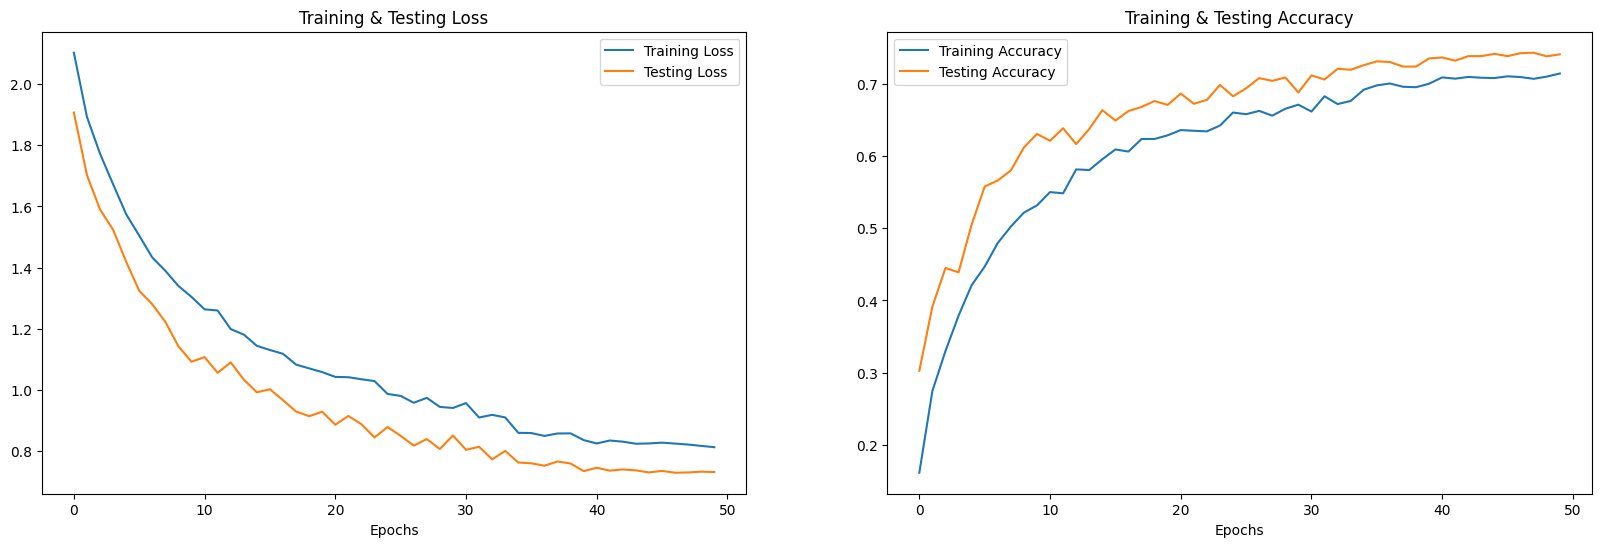

100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step


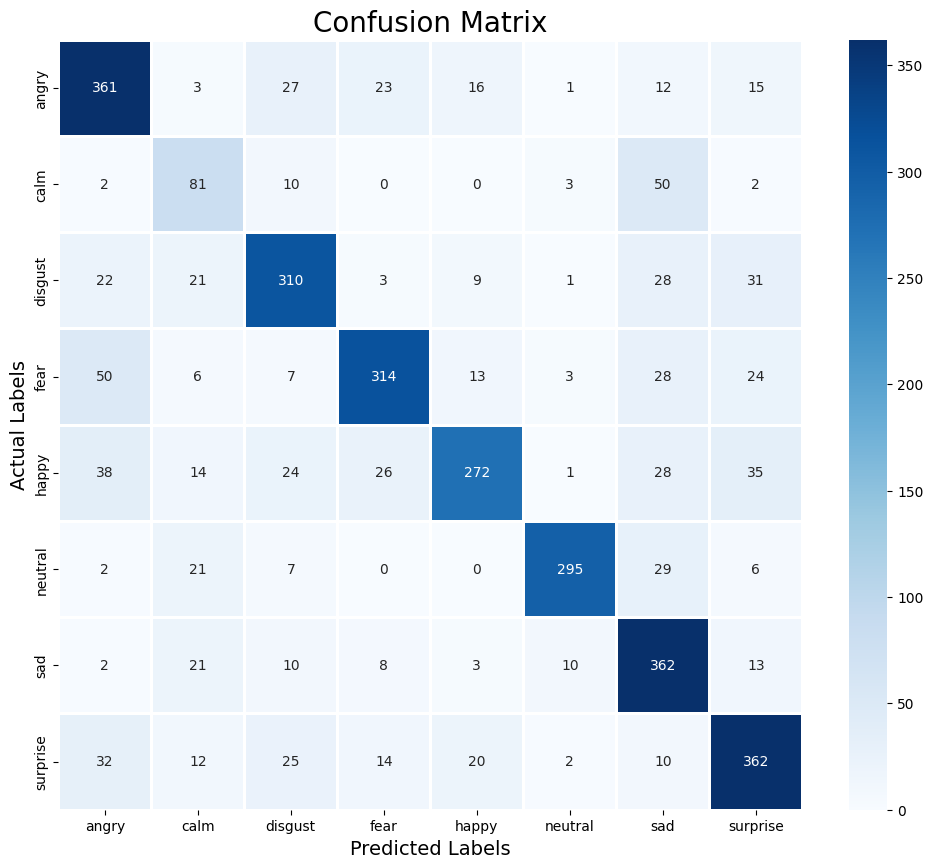

              precision    recall  f1-score   support

       angry       0.71      0.79      0.75       458
        calm       0.45      0.55      0.50       148
     disgust       0.74      0.73      0.73       425
        fear       0.81      0.71      0.75       445
       happy       0.82      0.62      0.71       438
     neutral       0.93      0.82      0.87       360
         sad       0.66      0.84      0.74       429
    surprise       0.74      0.76      0.75       477

    accuracy                           0.74      3180
   macro avg       0.73      0.73      0.73      3180
weighted avg       0.75      0.74      0.74      3180



In [3]:
import pandas as pd
import numpy as np
import os
import sys
import librosa
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense, Dropout, Flatten
from keras.callbacks import ReduceLROnPlateau
from keras.optimizers import Adam
from keras.constraints import MaxNorm  # For gradient clipping
import warnings

# Ignore warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

# Load features and labels
Features = pd.read_csv('features.csv')

# Prepare data
X = Features.iloc[:, :-1].values
Y = Features['labels'].values

# One-hot encode labels
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1, 1)).toarray()

# Split the data
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=0, shuffle=True)

# Scale the data
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Reshape data for RNN (must be 3D for RNN input)
x_train = np.expand_dims(x_train, axis=2)
x_test = np.expand_dims(x_test, axis=2)

# Build the RNN-based model with gradient clipping
model = Sequential(name="RNN_Model")  # Adding a custom model name

# RNN layers with tanh activation and MaxNorm to prevent gradient explosion
model.add(SimpleRNN(128, return_sequences=True, input_shape=(x_train.shape[1], 1), activation='tanh', kernel_constraint=MaxNorm(3)))
model.add(Dropout(0.3))

model.add(SimpleRNN(64, activation='tanh', kernel_constraint=MaxNorm(3)))
model.add(Dropout(0.3))

# Dense layers for classification
model.add(Flatten())
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.3))

# Final output layer for the number of classes
model.add(Dense(units=len(encoder.categories_[0]), activation='softmax'))

# Compile the model with a lower learning rate and Adam optimizer
optimizer = Adam(learning_rate=1e-4)  # Adjust learning rate
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()

# Set up learning rate reduction
rlrp = ReduceLROnPlateau(monitor='loss', factor=0.4, verbose=1, patience=2, min_lr=1e-7)

# Train the model
history = model.fit(x_train, y_train, batch_size=64, epochs=50, validation_data=(x_test, y_test), callbacks=[rlrp])

# Evaluate the model
print("Accuracy of our model on test data:", model.evaluate(x_test, y_test)[1] * 100, "%")

# Plot training and validation metrics
epochs = [i for i in range(50)]
fig, ax = plt.subplots(1, 2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20, 6)
ax[0].plot(epochs, train_loss, label='Training Loss')
ax[0].plot(epochs, test_loss, label='Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs, train_acc, label='Training Accuracy')
ax[1].plot(epochs, test_acc, label='Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

# Predict on test data
pred_test = model.predict(x_test)

# Inverse transform the predicted labels
y_pred = encoder.inverse_transform(pred_test)

# Get actual labels
y_test_labels = encoder.inverse_transform(y_test)

# Create a DataFrame for comparison
df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_pred.flatten()
df['Actual Labels'] = y_test_labels.flatten()

# Confusion matrix
cm = confusion_matrix(y_test_labels, y_pred)
cm_df = pd.DataFrame(cm, index=encoder.categories_[0], columns=encoder.categories_[0])

# Plot confusion matrix
plt.figure(figsize=(12, 10))
sns.heatmap(cm_df, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

# Print classification report
print(classification_report(y_test_labels, y_pred))
